## Applying models and improving performance of models

In [51]:
import pandas as pd
import numpy as np
from minepy import MINE
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from scipy import stats
import math
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
# import xgboost
from sklearn.linear_model import LinearRegression
from sklearn import cross_validation, tree, linear_model
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.decomposition import PCA
from sklearn.linear_model import Lasso, Ridge, ElasticNet
import lightgbm as lgb

In [50]:
# import xgboost as xgb
# !pip install lightgbm

grin 1.2.1 requires argparse>=1.1, which is not installed.


In [15]:
Data = pd.read_csv('data_with_month.csv')
Data.head()

,Unnamed: 0,Price,Transfer_Date,Postcode,Property_Type,Old_New,Duration,Primary_Address,Secondary_Address,Street,Locality,Town_City,District,PP_Type,transfer_year,transfer_month,postcode_mod,postcode_mod1,postcode_two_char,postcode_four_char
0,0,48000,20/02/1995,GU29 9TQ,Apartment,Resale,Leasehold,56,NaN,BARLAVINGTON WAY,MIDHURST,MIDHURST,CHICHESTER,A,1995,2,GU,GU29,GU,GU29
1,1,115000,28/02/1995,PO19 3PY,Apartment,Resale,Leasehold,NORTHLANDS HOUSE,FLAT 5,SALTHILL ROAD,CHICHESTER,CHICHESTER,CHICHESTER,A,1995,2,PO,PO19,PO,PO19
2,2,102500,28/07/1995,PO20 8PX,Detached,Resale,Freehold,KILMEEN,NaN,BRIAR AVENUE,WEST WITTERING,CHICHESTER,CHICHESTER,A,1995,7,PO,PO20,PO,PO20
3,3,53000,24/03/1995,PO20 0TD,Terraced,Resale,Freehold,9,NaN,ST GEORGES CLOSE,SELSEY,CHICHESTER,CHICHESTER,A,1995,3,PO,PO20,PO,PO20
4,4,45000,20/03/1995,PO10 8LZ,Terraced,Resale,Freehold,26,NaN,MANOR WAY,SOUTHBOURNE,EMSWORTH,CHICHESTER,A,1995,3,PO,PO10,PO,PO10


In [16]:
Data.columns
# Data.shape

Index([u'Unnamed: 0', u'Price', u'Transfer_Date', u'Postcode',
       u'Property_Type', u'Old_New', u'Duration', u'Primary_Address',
       u'Secondary_Address', u'Street', u'Locality', u'Town_City', u'District',
       u'PP_Type', u'transfer_year', u'transfer_month', u'postcode_mod',
       u'postcode_mod1', u'postcode_two_char', u'postcode_four_char'],
      dtype='object')

In [17]:
# Dropping the rows where postcode filed is null
Data.drop(Data[Data.Postcode.isnull()].index, inplace=True)
Data.shape

(52901, 20)

In [18]:
# Dropping District columns as it has all same value as chichester
cols_to_drop = ['District', 'Unnamed: 0', 'Locality', 'Postcode', 'Primary_Address', 'Secondary_Address', 'Street', 'Transfer_Date',
               'Town_City', 'postcode_mod', 'postcode_mod1']
Data.drop(Data[cols_to_drop], axis = 1, inplace = True)

** For applying machine learning models we have to check different features and may have to drop some irrelevant features too. **

In [19]:
Data.head()
# Data.to_csv('Reduced_Data_columns.csv')

,Price,Property_Type,Old_New,Duration,PP_Type,transfer_year,transfer_month,postcode_two_char,postcode_four_char
0,48000,Apartment,Resale,Leasehold,A,1995,2,GU,GU29
1,115000,Apartment,Resale,Leasehold,A,1995,2,PO,PO19
2,102500,Detached,Resale,Freehold,A,1995,7,PO,PO20
3,53000,Terraced,Resale,Freehold,A,1995,3,PO,PO20
4,45000,Terraced,Resale,Freehold,A,1995,3,PO,PO10


** In the first notebook python of exploring data we have seen that 'Secondary_Address' has 46699 records null, so we will  npt include this feature. District columns contains only one value as Chichester so we will exclude this because it doesn't provide any insight for predicitons. Locality, Primary address, secondary addresss, street has not significant impact on the price. Transfer Date has been removed because we extracted month and year from that and deleted the original one. From postcode as well we created new two features and dropped the postcode.**

In [20]:
Data['high_season'] = Data[['transfer_month']].replace({1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 1, 7: 1, 8: 1, 9: 0, 10: 0, 11: 0, 12: 0})
Data.head()

,Price,Property_Type,Old_New,Duration,PP_Type,transfer_year,transfer_month,postcode_two_char,postcode_four_char,high_season
0,48000,Apartment,Resale,Leasehold,A,1995,2,GU,GU29,0
1,115000,Apartment,Resale,Leasehold,A,1995,2,PO,PO19,0
2,102500,Detached,Resale,Freehold,A,1995,7,PO,PO20,1
3,53000,Terraced,Resale,Freehold,A,1995,3,PO,PO20,0
4,45000,Terraced,Resale,Freehold,A,1995,3,PO,PO10,0


In [21]:
# Dropping transfer_month column and checking the high_season added column
Data.drop(['transfer_month'], axis = 1, inplace = True)
Data.head()

,Price,Property_Type,Old_New,Duration,PP_Type,transfer_year,postcode_two_char,postcode_four_char,high_season
0,48000,Apartment,Resale,Leasehold,A,1995,GU,GU29,0
1,115000,Apartment,Resale,Leasehold,A,1995,PO,PO19,0
2,102500,Detached,Resale,Freehold,A,1995,PO,PO20,1
3,53000,Terraced,Resale,Freehold,A,1995,PO,PO20,0
4,45000,Terraced,Resale,Freehold,A,1995,PO,PO10,0


** New feature called high_season has been created as we see in the earlier notbook that during June, July and August House Price is high. This is why we are calling it as high season period. **

**Instead of using whole postcode we will use first 3 to 4 characters of the postcode because this is also kind of showing the locality and we want to check how it works for our model prediction.**

In [50]:
# Encoding the categorical variables with differnt methods:
# Method 1 directly replacing

In [22]:
Data_MIC = Data

In [23]:
def replace_column(x) :
    if(x == 'Resale'):
        x = 1
    else:
        x = 2
    return x

Data_MIC['Old_New'] = Data_MIC['Old_New'].apply(lambda x : replace_column(x))

In [24]:
Data_MIC.Old_New.value_counts()

1    47598
2     5303
Name: Old_New, dtype: int64

In [25]:
# Method 2 of LabelEncoder of sklearn.preprocessing

In [23]:
def label_encoding(Data, columnName, NewColumnName):
    lb_make = LabelEncoder()
    Data[NewColumnName] = lb_make.fit_transform(Data[columnName])

In [24]:
label_encoding(Data_MIC, 'postcode_two_char', 'postcode_two_char_new')

In [25]:
label_encoding(Data_MIC, 'postcode_four_char', 'postcode_four_char_new')

In [26]:
label_encoding(Data_MIC, 'Property_Type', 'Property_Type_new')

In [27]:
label_encoding(Data_MIC, 'Duration', 'Duration_new')

In [28]:
label_encoding(Data_MIC, 'PP_Type', 'PP_Type_new')

In [29]:
label_encoding(Data_MIC, 'Old_New', 'Old_New_new')

In [30]:
# Now we see that we have many columns added with encoding method
Data_MIC.columns

Index([u'Price', u'Property_Type', u'Old_New', u'Duration', u'PP_Type',
       u'transfer_year', u'postcode_two_char', u'postcode_four_char',
       u'high_season', u'postcode_two_char_new', u'postcode_four_char_new',
       u'Property_Type_new', u'Duration_new', u'PP_Type_new', u'Old_New_new'],
      dtype='object')

In [36]:
# saving this file
Data_MIC.to_csv('MIC_Data.csv')

** We are checking MIC(Maximal Information Coefficient). As our data is not numerical so applying pearson correlation for calculating correlation does not make sense. It is better way to find correlation for categorical data by MIC**

In [31]:
Data_for_MIC = Data_MIC[['Duration_new', 'PP_Type_new', 'Price', 'Property_Type_new', 'postcode_four_char_new', 'postcode_two_char_new', 'Old_New_new']]
Data_for_MIC.head()

,Duration_new,PP_Type_new,Price,Property_Type_new,postcode_four_char_new,postcode_two_char_new,Old_New_new
0,1,0,48000,0,15,1,1
1,1,0,115000,0,24,2,1
2,0,0,102500,1,25,2,1
3,0,0,53000,4,25,2,1
4,0,0,45000,4,21,2,1


In [32]:
def mic(param1, param2):
    
    """Input is two parameters between which we want to calculate MIC.
        Output is the MIC value."""
    
    m = MINE()
    m.compute_score(param1, param2)
    return m.mic()

In [33]:
tmp = Data_for_MIC.values
print('MIC between Price and Old_New_new is =', mic(tmp[:,2], tmp[:,6]))
print('MIC between Price and postcode_four_char_new is =', mic(tmp[:,2], tmp[:,4]))
print('MIC between Price and postcode_two_char_new is =', mic(tmp[:,2], tmp[:,5]))
print('MIC between Price and Property_Type_new is =', mic(tmp[:,2], tmp[:,3]))
print('MIC between Price and PP_Type_new is =', mic(tmp[:,2], tmp[:,1]))
print('MIC between Price and Duration_new is =', mic(tmp[:,2], tmp[:,0]))

('MIC between Price and Old_New_new is =', 0.049000884541730794)
('MIC between Price and postcode_four_char_new is =', 0.05283946802498946)
('MIC between Price and postcode_two_char_new is =', 0.04167159655809659)
('MIC between Price and Property_Type_new is =', 0.14406171159033865)
('MIC between Price and PP_Type_new is =', 0.038957418779547996)
('MIC between Price and Duration_new is =', 0.10565785560840131)


In [49]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52901 entries, 0 to 52958
Data columns (total 15 columns):
Price                     52901 non-null int64
Property_Type             52901 non-null object
Old_New                   52901 non-null int64
Duration                  52901 non-null object
PP_Type                   52901 non-null object
transfer_year             52901 non-null int64
postcode_two_char         52901 non-null object
postcode_four_char        52901 non-null object
high_season               52901 non-null int64
postcode_two_char_new     52901 non-null int64
postcode_four_char_new    52901 non-null int64
Property_Type_new         52901 non-null int64
Duration_new              52901 non-null int64
PP_Type_new               52901 non-null int64
Old_New_new               52901 non-null int64
dtypes: int64(10), object(5)
memory usage: 6.5+ MB


** From above we see that Property type and Duration feature has MIC as 0.14 and 0.10 respectively, which means that price is more dependent on Property type and duration than other fetures menthioned above. Adding postcode_four_char feature is more suitable as it has High MIC than postcode_two_char.
**

In [34]:
def remove_outlier(data, col_name):
    
    """This function removes the outlier in the given columns. Input is data and column name for which the outliers we have to decide.
    output is the dataframe which will not contain the outliers."""
    
    q1 = data[col_name].quantile(0.25)
    q3 = data[col_name].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    low  = q1-1.5*iqr
    high = q3+1.5*iqr
    data1 = data.loc[(data[col_name] > low) & (data[col_name] < high)]
    return data1

In [35]:
DataIQR = Data
DataIQR = remove_outlier(DataIQR, 'Price')

In [36]:
DataIQR.shape
# DataIQR.to_csv('Data_outliers_removed.csv')

(49375, 15)

** We have removed outliers from price data and we will check if this will make model better or not **

** We convert categorical features to new columns by using get_dummies method **

In [37]:
cols = ['Price', 'Old_New', 'postcode_four_char', 'Duration', 'Property_Type', 'transfer_year', 'high_season']
Data_dummy = Data[cols]
Data_dummy = pd.get_dummies(Data_dummy)

In [38]:
Data_dummy.head()

,Price,transfer_year,high_season,Old_New_New Build,Old_New_Resale,postcode_four_char_BN11,postcode_four_char_BN12,postcode_four_char_BN14,postcode_four_char_BN15,postcode_four_char_BN16,...,postcode_four_char_RH19,postcode_four_char_RH20,postcode_four_char_SO50,Duration_Freehold,Duration_Leasehold,Property_Type_Apartment,Property_Type_Detached,Property_Type_Other,Property_Type_Semi-Detached,Property_Type_Terraced
0,48000,1995,0,0,1,0,0,0,0,0,...,0,0,0,0,1,1,0,0,0,0
1,115000,1995,0,0,1,0,0,0,0,0,...,0,0,0,0,1,1,0,0,0,0
2,102500,1995,1,0,1,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
3,53000,1995,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
4,45000,1995,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1


In [39]:
Data_dummy.columns

Index([u'Price', u'transfer_year', u'high_season', u'Old_New_New Build',
       u'Old_New_Resale', u'postcode_four_char_BN11',
       u'postcode_four_char_BN12', u'postcode_four_char_BN14',
       u'postcode_four_char_BN15', u'postcode_four_char_BN16',
       u'postcode_four_char_BN17', u'postcode_four_char_BN18',
       u'postcode_four_char_BN20', u'postcode_four_char_BN41',
       u'postcode_four_char_BN43', u'postcode_four_char_BN5',
       u'postcode_four_char_BN6', u'postcode_four_char_GU26',
       u'postcode_four_char_GU27', u'postcode_four_char_GU28',
       u'postcode_four_char_GU29', u'postcode_four_char_GU30',
       u'postcode_four_char_GU31', u'postcode_four_char_GU33',
       u'postcode_four_char_GU6', u'postcode_four_char_GU8',
       u'postcode_four_char_PO10', u'postcode_four_char_PO16',
       u'postcode_four_char_PO18', u'postcode_four_char_PO19',
       u'postcode_four_char_PO20', u'postcode_four_char_PO21',
       u'postcode_four_char_PO22', u'postcode_four_char_PO

## Apply models

In [40]:
# standard scalar 
def scaling_data(data, cols): 
    
    """Scaling the data with standardscalar method. Input is data and columns.
    Output is the dataframe of scaled data."""
    
    data = data[cols]
    scaler = StandardScaler()
    scaler.fit(data)
    data = scaler.transform(data)
    Data = pd.DataFrame(data)
    Data.columns = cols
    return Data

In [41]:
all_cols = Data_dummy.columns
Data_dummy_all = scaling_data(Data_dummy, all_cols)
Data_dummy_all.head()

,Price,transfer_year,high_season,Old_New_New Build,Old_New_Resale,postcode_four_char_BN11,postcode_four_char_BN12,postcode_four_char_BN14,postcode_four_char_BN15,postcode_four_char_BN16,...,postcode_four_char_RH19,postcode_four_char_RH20,postcode_four_char_SO50,Duration_Freehold,Duration_Leasehold,Property_Type_Apartment,Property_Type_Detached,Property_Type_Other,Property_Type_Semi-Detached,Property_Type_Terraced
0,-0.703051,-1.616344,-0.636541,-0.333785,0.333785,-0.006149,-0.004348,-0.007531,-0.004348,-0.006149,...,-0.007531,-0.11919,-0.004348,-2.180192,2.180192,2.278031,-0.771293,-0.094272,-0.552127,-0.535727
1,-0.496602,-1.616344,-0.636541,-0.333785,0.333785,-0.006149,-0.004348,-0.007531,-0.004348,-0.006149,...,-0.007531,-0.11919,-0.004348,-2.180192,2.180192,2.278031,-0.771293,-0.094272,-0.552127,-0.535727
2,-0.535118,-1.616344,1.570990,-0.333785,0.333785,-0.006149,-0.004348,-0.007531,-0.004348,-0.006149,...,-0.007531,-0.11919,-0.004348,0.458675,-0.458675,-0.438976,1.296524,-0.094272,-0.552127,-0.535727
3,-0.687645,-1.616344,-0.636541,-0.333785,0.333785,-0.006149,-0.004348,-0.007531,-0.004348,-0.006149,...,-0.007531,-0.11919,-0.004348,0.458675,-0.458675,-0.438976,-0.771293,-0.094272,-0.552127,1.866621
4,-0.712296,-1.616344,-0.636541,-0.333785,0.333785,-0.006149,-0.004348,-0.007531,-0.004348,-0.006149,...,-0.007531,-0.11919,-0.004348,0.458675,-0.458675,-0.438976,-0.771293,-0.094272,-0.552127,1.866621


In [42]:
X = Data_dummy_all[Data_dummy_all.columns.difference(['Price'])]
y = Data_dummy_all['Price']
X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y ,test_size=0.2)

In [52]:
best_alpha = 0.0099
regr = Lasso(alpha=best_alpha, max_iter=50000)
regr2 = ElasticNet(alpha=0.001)
regr3 = RandomForestRegressor( n_estimators = 600, max_depth=10, min_samples_split = 10, random_state=42)
GBoost = GradientBoostingRegressor(n_estimators=600, min_samples_split=10,  random_state =5)
model_lgb = lgb.LGBMRegressor(objective='regression', n_estimators=600)

In [44]:
def rmse(y_true, y_pred):
    
    """Calculating the root mean squared error. Input is predicted and true value. 
    Output is the RMSE value."""
    
    return np.sqrt(mean_squared_error(y_true, y_pred))

In [45]:
def model_Evaluation(model, x, y):
    
    """It takes the model, train and test data. Then fits the data and calculates the prediction and RMSE.
    Output is the mean RMSE of for the model."""
    
    n_splits_val = 5
    kf = KFold(n_splits=n_splits_val, shuffle=False)
    idx = 0
    rmse_buf = np.empty(n_splits_val)
    for train, test in kf.split(x):
        model.fit(x.iloc[train], y.iloc[train])
        y_cv = model.predict(x.iloc[test])
        rmse_buf[idx] = rmse(y.iloc[test], y_cv)
        idx += 1

    mean_rmse = np.mean(rmse_buf)
    print('Mean RMSE = %f' % mean_rmse)
    return mean_rmse


In [87]:
model_Evaluation(regr, X, y)

Mean RMSE = 0.741212


0.74121188870930454

** When we added all the columns like 'Price', 'Old_New', 'postcode_four_char', 'Duration', 'Property_Type', 'transfer_year', 'high_season'. We got RMSE of 0.7412 with LASSO**

In [92]:
model_Evaluation(regr2, X, y)

Mean RMSE = 0.741388


0.74138796742545976

** We applied Elastic Net for the same above data and got RMSE of 0.74138. So, it is similar to LASSO.**

In [94]:
model_Evaluation(regr3, X, y)

Mean RMSE = 0.725732


0.72573194270638908

** when we applied RandomForestRegressor it gave RMSE of 0.72573 on the same above data. This is better than LASSO and Elastic NEt. **

In [48]:
model_Evaluation(GBoost, X, y)

Mean RMSE = 0.721770


0.72176980536773494

** when we applied GradientBoostingRegressor it gave RMSE of  0.72176 on the same above data. This is similar to RandomForestRegressor. **

In [53]:
model_Evaluation(model_lgb, X, y)

Mean RMSE = 0.720200


0.72020005067115755

** when we applied LightGBM it gave RMSE of 0.7202 on the same above data.**

**When we remove some columns and check how this will improve our model performance.**

In [57]:
cols = ['Price', 'Property_Type', 'transfer_year', 'high_season']
Data_dummy = Data[cols]
Data_dummy = pd.get_dummies(Data_dummy)
# scaling this data
all_cols = Data_dummy.columns
Data_dummy_all = scaling_data(Data_dummy, all_cols)
Data_dummy_all.head()
X = Data_dummy_all[Data_dummy_all.columns.difference(['Price'])]
y = Data_dummy_all['Price']
X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y ,test_size=0.2)

In [61]:
print('LASSO RMSE = ', model_Evaluation(regr, X, y))
print('Elastic Net RMSE = ', model_Evaluation(regr2, X, y))
print('RandomForestRegressor RMSE = ', model_Evaluation(regr3, X, y))
print('GradientBoostingRegressor RMSE = ', model_Evaluation(GBoost, X, y))
print('light gbm RMSE = ', model_Evaluation(model_lgb, X, y))

Mean RMSE = 0.756353
('LASSO RMSE = ', 0.75635262489992861)
Mean RMSE = 0.755629
('Elastic Net RMSE = ', 0.75562881557245853)
Mean RMSE = 0.742629
('RandomForestRegressor RMSE = ', 0.74262854140182322)
Mean RMSE = 0.742107
('GradientBoostingRegressor RMSE = ', 0.74210708228300537)
Mean RMSE = 0.741132
('light gbm RMSE = ', 0.74113235835642777)


** Lets check with by adding feature postcode_four_char feature ** 

In [62]:
cols = ['Price', 'postcode_four_char', 'Property_Type', 'transfer_year', 'high_season']
Data_dummy = Data[cols]
Data_dummy = pd.get_dummies(Data_dummy)
# scaling this data
all_cols = Data_dummy.columns
Data_dummy_all = scaling_data(Data_dummy, all_cols)
Data_dummy_all.head()
X = Data_dummy_all[Data_dummy_all.columns.difference(['Price'])]
y = Data_dummy_all['Price']
X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y ,test_size=0.2)

In [63]:
print('LASSO RMSE = ', model_Evaluation(regr, X, y))
print('Elastic Net RMSE = ', model_Evaluation(regr2, X, y))
print('RandomForestRegressor RMSE = ', model_Evaluation(regr3, X, y))
print('GradientBoostingRegressor RMSE = ', model_Evaluation(GBoost, X, y))
print('light gbm RMSE = ', model_Evaluation(model_lgb, X, y))

Mean RMSE = 0.740995
('LASSO RMSE = ', 0.74099469653969519)
Mean RMSE = 0.740668
('Elastic Net RMSE = ', 0.74066761020876948)
Mean RMSE = 0.724330
('RandomForestRegressor RMSE = ', 0.72433045505398463)
Mean RMSE = 0.720950
('GradientBoostingRegressor RMSE = ', 0.72095035057284185)
Mean RMSE = 0.720055
('light gbm RMSE = ', 0.72005502857512371)


** We see that if we use 'Price', 'postcode_four_char', 'Property_Type', 'transfer_year', 'high_season' which gives better model than 
'Price', 'Property_Type', 'transfer_year', 'high_season' this columns.**

**When we apply log to the price that we have we can check how performance will improve**

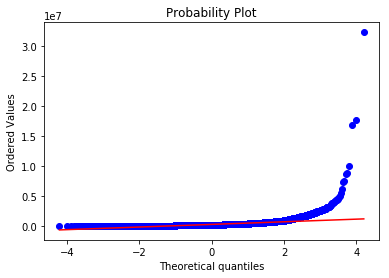

In [65]:
fig = plt.figure()
res = stats.probplot(Data['Price'], plot=plt)
plt.show()

** Original price distribution **

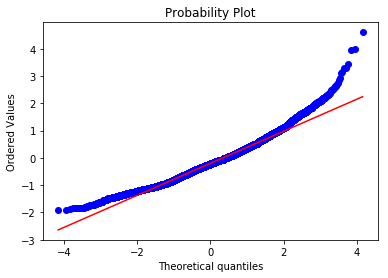

In [69]:
fig = plt.figure()
res = stats.probplot(np.log1p(y_train), plot=plt)
plt.show()

** Transforming to log distribution by applying log to the price value. **

In [84]:
def model_Evaluation1(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, np.log1p(y_train))
    y_cv = model.predict(X_test)
    return rmse(y_test, y_cv)

In [85]:
print('LASSO RMSE = ', model_Evaluation1(regr, X_train, y_train, X_test, y_test))
print('Elastic Net RMSE = ', model_Evaluation1(regr2, X_train, y_train, X_test, y_test))
print('RandomForestRegressor RMSE = ', model_Evaluation1(regr3, X_train, y_train, X_test, y_test))
print('GradientBoostingRegressor RMSE = ', model_Evaluation1(GBoost, X_train, y_train, X_test, y_test))
print('light gbm RMSE = ', model_Evaluation1(model_lgb, X_train, y_train, X_test, y_test))

('LASSO RMSE = ', 0.68472929567912799)
('Elastic Net RMSE = ', 0.681781025193677)
('RandomForestRegressor RMSE = ', 0.67224979268307938)
('GradientBoostingRegressor RMSE = ', 0.67118130810055454)
('light gbm RMSE = ', 0.67210567560957446)


** Above result is shown when we apply log transformation on the price. This result is better than all we had earlier.**

**If we add data of school ratings in the given postcode areas. we want to check performance of model**

In [99]:
school_rating = pd.read_csv('SchoolRating.csv', header = 0)
Dataa = Data[['Price', 'postcode_four_char', 'Property_Type', 'transfer_year', 'high_season']]
Dataa = pd.merge(Dataa, school_rating, on='postcode_four_char')
Dataa.head()
# Dataa.to_csv('school_included_data.csv')

,Price,postcode_four_char,Property_Type,transfer_year,high_season,School_rating
0,48000,GU29,Apartment,1995,0,5.0
1,380000,GU29,Detached,1995,1,5.0
2,47750,GU29,Apartment,1995,0,5.0
3,52000,GU29,Apartment,1995,1,5.0
4,73000,GU29,Terraced,1995,0,5.0


In [102]:
data = pd.concat([Dataa['Price'], Dataa['School_rating']], axis=1)
f, ax = plt.subplots(figsize=(16, 8))
fig = sns.boxplot(x='School_rating', y="Price", data=data)
fig.axis(ymin=0, ymax=800000)
plt.xticks(rotation=90)
# plt.savefig('zoomed_school_rating.png')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21]), <a list of 22 Text xticklabel objects>)

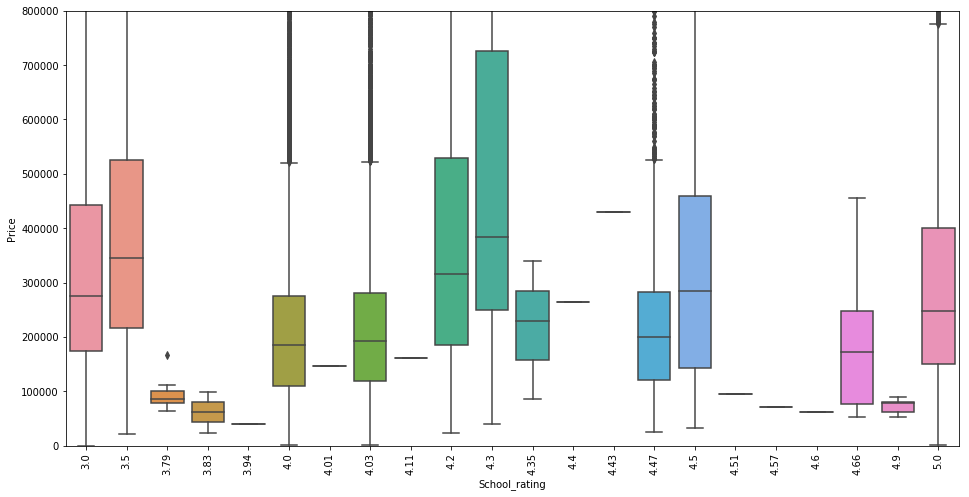

In [103]:
plt.show()

In [104]:
cols = ['Price', 'postcode_four_char', 'Property_Type', 'transfer_year', 'high_season', 'School_rating']
Data_dummy = Dataa[cols]
Data_dummy = pd.get_dummies(Data_dummy)
# scaling this data
all_cols = Data_dummy.columns
Data_dummy_all = scaling_data(Data_dummy, all_cols)
Data_dummy_all.head()
X = Data_dummy_all[Data_dummy_all.columns.difference(['Price'])]
y = Data_dummy_all['Price']
X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y ,test_size=0.2)

In [108]:
print('LASSO RMSE = ', model_Evaluation1(regr, X_train, y_train, X_test, y_test))
print('Elastic Net RMSE = ', model_Evaluation1(regr2, X_train, y_train, X_test, y_test))
print('RandomForestRegressor RMSE = ', model_Evaluation1(regr3, X_train, y_train, X_test, y_test))
print('GradientBoostingRegressor RMSE = ', model_Evaluation1(GBoost, X_train, y_train, X_test, y_test))
print('light gbm RMSE = ', model_Evaluation1(model_lgb, X_train, y_train, X_test, y_test))

('LASSO RMSE = ', 0.64941721512378592)
('Elastic Net RMSE = ', 0.64657511479385588)
('RandomForestRegressor RMSE = ', 0.63730412596019226)
('GradientBoostingRegressor RMSE = ', 0.63702891936821748)
('light gbm RMSE = ', 0.63926611078844364)


** when we add the parameter school rating, we see that there is improvement in the model performance. We can add parameters like number of stores nearby that postcode, population of that area/postcode which tells us about the house prices ** 

** We above created data which has no outliers for the price feature and we want to check the performance on this scenario, **

In [163]:
school_rating = pd.read_csv('SchoolRating.csv', header = 0)
outliers_removed_data = pd.read_csv('Data_outliers_removed.csv')
outliers_removed_data = outliers_removed_data[['Price', 'Property_Type', 'high_season', 'postcode_four_char', 'transfer_year']]
tt = pd.merge(outliers_removed_data, school_rating, on = 'postcode_four_char')
tt.columns

Index([u'Price', u'Property_Type', u'high_season', u'postcode_four_char',
       u'transfer_year', u'School_rating'],
      dtype='object')

In [169]:
cols = tt.columns
Data_dummy = tt[cols]
Data_dummy = pd.get_dummies(Data_dummy)
# Data_dummy.columns
# scaling this data
all_cols = Data_dummy.columns
Data_dummy_all = scaling_data(Data_dummy, all_cols)
Data_dummy_all.head()
X = Data_dummy_all[Data_dummy_all.columns.difference(['Price'])]
# X.columns
y = Data_dummy_all['Price']
X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y ,test_size=0.2)

In [185]:
print('LASSO RMSE = ', model_Evaluation(regr, X, y))
print('Elastic Net RMSE = ', model_Evaluation(regr2, X, y))
print('RandomForestRegressor RMSE = ', model_Evaluation(regr3,X, y))
print('GradientBoostingRegressor RMSE = ', model_Evaluation(GBoost, X, y))
print('light gbm RMSE = ', model_Evaluation(model_lgb, X, y))

Mean RMSE = 0.690611
('LASSO RMSE = ', 0.69061098496526352)
Mean RMSE = 0.689937
('Elastic Net RMSE = ', 0.68993663709235142)
Mean RMSE = 0.714813
('RandomForestRegressor RMSE = ', 0.71481331370951595)
Mean RMSE = 0.662584
('GradientBoostingRegressor RMSE = ', 0.66258382525438386)
Mean RMSE = 0.687357
('light gbm RMSE = ', 0.68735677003002671)


** As we see that the there is no performance improvement when we use data with outliers removed. **

In [680]:
X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y ,test_size=0.2)

** Below method is used to get the best parameters require for random forest regressor model. We have used RandomizedSearchCV method **

In [692]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split}


In [778]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  7.6min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed: 35.1min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 79.5min finished


RandomizedSearchCV(cv=3, error_score='raise',
          estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
          fit_params=None, iid=True, n_iter=100, n_jobs=-1,
          param_distributions={'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['sqrt'], 'min_samples_split': [2, 5, 10], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None]},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          return_train_score='warn', scoring=None, verbose=2)

In [784]:
rf_random.best_params_

{'max_depth': 10,
 'max_features': 'sqrt',
 'min_samples_split': 10,
 'n_estimators': 600}

** above are the best parameters and thier values to use for training the model **